# Task1 : Data Cleaning

In [3]:
# Loading the libraries required for the assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nba_players = pd.read_csv('NBA_players_stats.csv',error_bad_lines=True)
nba_players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800


In [5]:
len(nba_players) == 512 # Total number of rows available (Validating all the rows are imported after analysing the csv)

True

In [6]:
# Datatypes of the columns. Ensuring the datatypes are proper for the columns.
nba_players.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [7]:
 # This block of code will give me an idea of Missing value statistics
column_value_counts = nba_players.count() 
column_value_counts_difference = len(nba_players) - column_value_counts
column_value_counts_difference[column_value_counts_difference>0]

FG%     3
3P%    33
2P%     7
FT%    32
dtype: int64

In [8]:
# From the analysis above it is seen that numeric columns only have missing values. So, we can analyse the char columns
# This is the portion where the trimming operation is being carried out to avoid white spaces
nba_players['Player'] = nba_players['Player'].apply(lambda x : x.strip())
nba_players['Pos'] = nba_players['Pos'].apply(lambda x : x.strip())
nba_players['Tm'] = nba_players['Tm'].apply(lambda x : x.strip()) 

In [9]:
# Sanity check for player names. [Just to check player names are not repeated too much] 
player_names_count = nba_players[['Player']].value_counts()
print(len(player_names_count[player_names_count==3])) # shows 10 players played for 3 teams (Checked with the csv)
print(len(player_names_count[player_names_count==2]))
print(len(player_names_count[player_names_count==1]))# shows 482 played only with one team

10
0
482


In [10]:
positions = ('PF', 'PG', 'C', 'SG', 'SF', 'PG-SG', 'SF-PF')
nba_players['Pos'].nunique() == len(positions) # condition to check whether the no of positions in the data is correct

False

In [11]:
# Getting the different positions and counts
nba_players['Pos'].value_counts()

SG       121
PF       103
C        100
PG        95
SF        84
SF.        1
SGa        1
Pg         1
PG-SG      1
pg         1
SF-PF      1
PFa        1
sg         1
Sf         1
Name: Pos, dtype: int64

In [12]:
# Fixing the errors with position names
nba_players.loc[(nba_players['Pos'] == 'Sf') | (nba_players['Pos'] == 'SF.'),'Pos'] = 'SF'
nba_players.loc[(nba_players['Pos'] == 'sg') | (nba_players['Pos'] == 'SGa'),'Pos'] = 'SG'
nba_players.loc[(nba_players['Pos'] == 'Pg') | (nba_players['Pos'] == 'pg'),'Pos'] = 'PG'
nba_players.loc[nba_players['Pos'] == 'PFa','Pos'] = 'PF'
nba_players['Pos'].nunique() == len(positions) # values has been corrected. This condition will be true now

True

In [13]:
# checking the differences between the expected and actual different number of teams
teams = ('MIA', 'MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT', 'BRK',
'CLE', 'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'LAC',
'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BOS', 'HOU')
nba_players['Tm'].nunique() - len(teams)

2

In [14]:
# From the above statement I understood there are two extra values.
# With this loop spitting out the wrong value in team names
for team in nba_players['Tm'].unique():
    if team not in teams:
        print(team)

H0U
NyK


In [15]:
# Fixing the errors with team names.
nba_players.loc[nba_players['Tm'] == 'H0U','Tm'] = 'HOU'
nba_players.loc[nba_players['Tm'] == 'NyK','Tm'] = 'NYK'
nba_players['Tm'].nunique() - len(teams) # if returns 0 indicates we have cleaned it properly

0

In [16]:
# Sanity check for FG < FGA and missing value count condition
print(len(nba_players.loc[nba_players['FG'] > nba_players['FGA']]) == 0)
fg_replace_condition = (nba_players['FG%'].isnull()) & (nba_players['FG'] == 0) & (nba_players['FGA'] ==0) 
len(nba_players.loc[fg_replace_condition]) == 3 #(Validating the missing values count is matching with FGA = 0 condition)

True


True

In [17]:
# Sanity check for 3P < 3PA and missing value count condition
print(len(nba_players.loc[nba_players['3P'] > nba_players['3PA']]) == 0)
p3_replace_condition = (nba_players['3P%'].isnull()) & (nba_players['3P'] == 0) & (nba_players['3PA'] ==0)
len(nba_players.loc[p3_replace_condition]) == 33

True


True

In [18]:
# Sanity check for 2P < 2PA and missing value count condition
print(len(nba_players.loc[nba_players['2P'] > nba_players['2PA']]) == 0)
p2_replace_condition = (nba_players['2P%'].isnull()) & (nba_players['2P'] == 0) & (nba_players['2PA'] ==0)
len(nba_players.loc[p2_replace_condition]) == 7

True


True

In [19]:
# Sanity check for FT < FTA and missing value count condition
print(len(nba_players.loc[nba_players['FT'] > nba_players['FTA']]) == 0)
ft_replace_condition = (nba_players['FT%'].isnull()) & (nba_players['FT'] == 0) & (nba_players['FTA'] ==0)
len(nba_players.loc[ft_replace_condition]) == 32

True


True

In [20]:
# filling the values with 0 - Dealing with missing values considering the values as 0 rather than deleting the observation
nba_players.fillna(0,inplace=True)

In [21]:
# sanity check for rank field - Value should be between 1 and 512
len(nba_players.loc[(nba_players['Rk'] > 512) & (nba_players['Rk'] < 1)]) == 0

True

In [22]:
# sanity check for TRB
len(nba_players.loc[nba_players['TRB']!= nba_players['ORB'] + nba_players['DRB']]) == 0

True

In [23]:
# Information from Wikipedia - Sanity check for age (As per NBA, minimum age is 19)
nba_players.loc[(nba_players['Age'] < 19) | (nba_players['Age'] > 40)]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
162,161,Anthony Gill,PF,280,WAS,12,1,67,3,10,...,0.75,3,16,19,4,3,2,3,3,10
197,194,Killian Hayes,PG,-19,DET,7,7,148,13,47,...,0.50,1,7,8,25,2,0,17,15,32


In [24]:
# Statistics of players with age 28
nba_players.loc[(nba_players['Age'] == 28) & (nba_players['Player']!='Anthony Gill') & (nba_players['G'] <= 20)].describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,279.777778,28.0,13.000000,6.888889,276.888889,44.666667,103.000000,0.476778,15.444444,44.444444,...,0.719667,11.111111,44.222222,55.333333,29.222222,10.888889,3.777778,13.888889,21.444444,119.888889
std,128.717499,0.0,5.958188,7.389933,209.313428,36.660606,89.371416,0.116628,12.709358,37.316589,...,0.160404,15.365907,35.657320,48.290786,25.863960,11.983785,4.763869,12.272372,16.055459,95.748948
min,51.000000,28.0,3.000000,0.000000,29.000000,3.000000,4.000000,0.385000,0.000000,0.000000,...,0.500000,0.000000,6.000000,7.000000,1.000000,0.000000,0.000000,1.000000,3.000000,10.000000
25%,236.000000,28.0,9.000000,1.000000,84.000000,16.000000,30.000000,0.389000,3.000000,12.000000,...,0.625000,2.000000,13.000000,20.000000,5.000000,2.000000,0.000000,3.000000,7.000000,42.000000
50%,304.000000,28.0,15.000000,2.000000,250.000000,35.000000,91.000000,0.429000,21.000000,51.000000,...,0.730000,6.000000,36.000000,38.000000,24.000000,6.000000,2.000000,13.000000,21.000000,103.000000
75%,351.000000,28.0,18.000000,15.000000,421.000000,70.000000,145.000000,0.514000,24.000000,67.000000,...,0.759000,7.000000,67.000000,74.000000,44.000000,15.000000,9.000000,20.000000,33.000000,176.000000
max,491.000000,28.0,19.000000,18.000000,635.000000,110.000000,284.000000,0.750000,35.000000,112.000000,...,1.000000,46.000000,102.000000,136.000000,71.000000,37.000000,11.000000,35.000000,47.000000,299.000000


In [25]:
# For the age -19 there is a high probability, it can be 19 and for 280, it can be 28 seeing from the players having similar age
nba_players.loc[nba_players['Age'] == 280,'Age'] = 28
nba_players.loc[nba_players['Age'] == -19,'Age'] = 19

In [26]:
 # max and min values of all the coulumns available. For finding any potential outliers.
nba_players.describe().loc[['min','max']].iloc[:,0:15]

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT
min,1.0,19.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,492.0,37.0,38.0,37.0,1358.0,379.0,764.0,1.0,169.0,411.0,1.0,329.0,543.0,1.0,298.0


In [27]:
# On checking the min and mx value there is a mistake in PTS column
nba_players.describe().loc[['min','max']].iloc[:,15:]

,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,363.0,1.0,159.0,357.0,472.0,345.0,63.0,111.0,149.0,228.0,28800.0


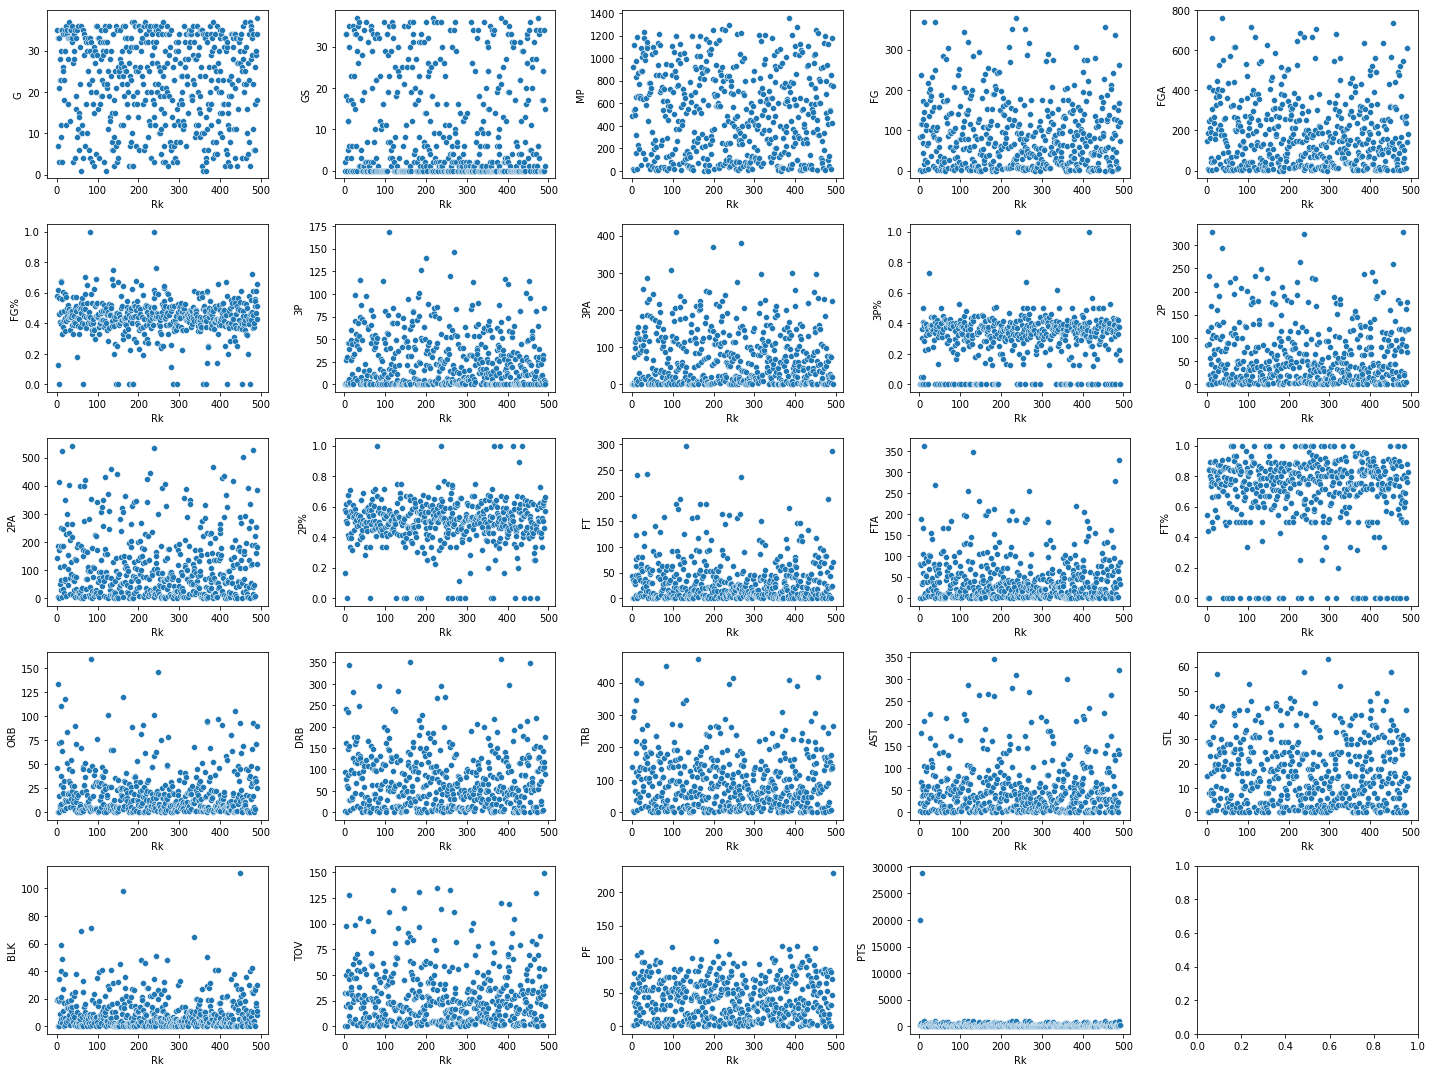

In [28]:
fig, axes = plt.subplots(5,5,figsize=(20,15))
sns.scatterplot(x='Rk',y='G',data=nba_players,ax=axes[0][0])
sns.scatterplot(x='Rk',y='GS',data=nba_players,ax=axes[0][1])
sns.scatterplot(x='Rk',y='MP',data=nba_players,ax=axes[0][2])
sns.scatterplot(x='Rk',y='FG',data=nba_players,ax=axes[0][3])
sns.scatterplot(x='Rk',y='FGA',data=nba_players,ax=axes[0][4])
sns.scatterplot(x='Rk',y='FG%',data=nba_players,ax=axes[1][0])
sns.scatterplot(x='Rk',y='3P',data=nba_players,ax=axes[1][1])
sns.scatterplot(x='Rk',y='3PA',data=nba_players,ax=axes[1][2])
sns.scatterplot(x='Rk',y='3P%',data=nba_players,ax=axes[1][3])
sns.scatterplot(x='Rk',y='2P',data=nba_players,ax=axes[1][4])
sns.scatterplot(x='Rk',y='2PA',data=nba_players,ax=axes[2][0])
sns.scatterplot(x='Rk',y='2P%',data=nba_players,ax=axes[2][1])
sns.scatterplot(x='Rk',y='FT',data=nba_players,ax=axes[2][2])
sns.scatterplot(x='Rk',y='FTA',data=nba_players,ax=axes[2][3])
sns.scatterplot(x='Rk',y='FT%',data=nba_players,ax=axes[2][4])
sns.scatterplot(x='Rk',y='ORB',data=nba_players,ax=axes[3][0])
sns.scatterplot(x='Rk',y='DRB',data=nba_players,ax=axes[3][1])
sns.scatterplot(x='Rk',y='TRB',data=nba_players,ax=axes[3][2])
sns.scatterplot(x='Rk',y='AST',data=nba_players,ax=axes[3][3])
sns.scatterplot(x='Rk',y='STL',data=nba_players,ax=axes[3][4])
sns.scatterplot(x='Rk',y='BLK',data=nba_players,ax=axes[4][0])
sns.scatterplot(x='Rk',y='TOV',data=nba_players,ax=axes[4][1])
sns.scatterplot(x='Rk',y='PF',data=nba_players,ax=axes[4][2])
sns.scatterplot(x='Rk',y='PTS',data=nba_players,ax=axes[4][3])
fig.tight_layout()

In [29]:
# Outliers for 3P%, FG% and 2P% columns
nba_players.loc[(nba_players['3P%'] == 1) | (nba_players['FG%'] ==1) | (nba_players['2P%'] ==1)]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
81,80,Devontae Cacok,PF,24,LAL,4,0,17,4,4,...,0.000,1,4,5,0,2,0,2,0,8
243,238,Damian Jones,C,25,LAL,3,1,31,5,5,...,1.000,2,3,5,0,0,4,0,6,12
246,241,Tre Jones,PG,21,SAS,12,0,43,9,15,...,1.000,4,0,4,3,0,0,4,4,24
380,367,Theo Pinson,SG,25,NYK,11,0,25,1,7,...,0.000,0,1,1,1,0,0,0,3,2
397,382,Jahmi'us Ramsey,SG,19,SAC,4,0,16,2,4,...,0.000,0,4,4,1,0,1,1,0,5
430,413,Iman Shumpert,SG,30,BRK,2,0,11,1,4,...,0.000,1,0,1,0,1,0,1,0,2
432,415,Chris Silva,PF,24,MIA,6,0,53,6,9,...,0.833,7,11,18,6,1,2,8,14,23
455,436,Brodric Thomas,SG,24,HOU,4,0,24,2,7,...,0.714,1,3,4,4,1,1,4,5,10


In [30]:
# Dropping the outliers after analysing the statistics.
nba_players.drop(nba_players.loc[(nba_players['3P%'] == 1) | (nba_players['FG%'] ==1) | (nba_players['2P%'] ==1)].index,inplace=True)

In [31]:
# There is a huge outlier for personal fouls for one player. Analysing it and its a very very rare case in basketball.
# Data indicates the player did 6 fouls in every game
nba_players.loc[nba_players['PF'] == nba_players['PF'].max()].iloc[:,:20]
# removing the observation
nba_players.drop(511,inplace=True)

In [32]:
# From the graph 2 outliers are seen and no negative values are present. Getting details of outliers for PTS
nba_players.loc[nba_players['PTS']>2000,['Tm','Player','G','FG%','FT%','PTS']]

,Tm,Player,G,FG%,FT%,PTS
1,MIL,Jaylen Adams,7,0.125,0.000,20000
4,SAS,LaMarcus Aldridge,21,0.464,0.838,28800


In [33]:
# Total points is sum of all the 2P, 3P and FT goals. Adding a column and finding the real issue
nba_players['PTS_CALC'] = nba_players['2P'] * 2 + nba_players['3P'] * 3 + nba_players['FT']
nba_players.loc[nba_players['PTS']!=nba_players['PTS_CALC'],['Player','Tm','2P','3P','FT','PTS_CALC','PTS']]

,Player,Tm,2P,3P,FT,PTS_CALC,PTS
1,Jaylen Adams,MIL,1,0,0,2,20000
4,LaMarcus Aldridge,SAS,88,27,31,288,28800


In [34]:
# After analysing understood that the actual values of the outliers should be 2 and 288 respectively
nba_players.loc[nba_players['PTS'] == 20000,'PTS'] = 2
nba_players.loc[nba_players['PTS'] == 28800,'PTS'] = 288

In [35]:
# Sanity check for minutes played. For any player MP should not be greater than G * 48 (as overtime is not considered)
len(nba_players.loc[nba_players['MP'] <= nba_players['G'] * 48]) == len(nba_players)

True

In [36]:
# sanity check for field goals = 2P + 3P. Validation of % values for 2P,3P and FT and understood there are three errors with 3P%
# Will handle this case in Task2.2
print(len(nba_players.loc[nba_players['FG'] != nba_players['2P'] + nba_players['3P']]) == 0,end = '\n\n')
print(nba_players.loc[(nba_players['FGA'] != 0) & (round(nba_players['FG%'],3) != round(nba_players['FG']/nba_players['FGA'],3)),['FG','FGA','FG%']],end = '\n\n')
print(nba_players.loc[(nba_players['2PA'] != 0) & (round(nba_players['2P%'],3) != round(nba_players['2P']/nba_players['2PA'],3)),['2P','2PA','2P%']],end = '\n\n')
print(nba_players.loc[(nba_players['3PA'] != 0) & (round(nba_players['3P%'],3) != round(nba_players['3P']/nba_players['3PA'],3)),['3P','3PA','3P%']],end = '\n\n')
print(nba_players.loc[(nba_players['FTA'] != 0) & (round(nba_players['FT%'],3) != round(nba_players['FT']/nba_players['FTA'],3)),['FT','FTA','FT%']],end = '\n\n')

True

     FG  FGA    FG%
453   5   16  0.313

     2P  2PA    2P%
347   5   16  0.313

     3P  3PA    3P%
3     2    6  0.050
8     4    8  0.050
25   34   92  0.730
56   10   32  0.313
362  35  112  0.313

     FT  FTA    FT%
165  49   80  0.613



In [37]:
nba_players.drop('PTS_CALC',axis=1,inplace=True)
nba_players.to_csv('cleaned_NBA_players_stats.csv',index=False)

# Task 2 :Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [38]:
top5_players = nba_players.sort_values('PTS',ascending=False).head()
top5_players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
38,37,Bradley Beal,SG,27,WAS,32,32,1143,368,764,...,0.903,43,131,174,151,44,14,105,82,1053
110,109,Stephen Curry,PG,32,GSW,35,35,1194,343,718,...,0.934,17,174,191,221,46,2,111,64,1039
13,12,Giannis Antetokounmpo,PF,26,MIL,35,35,1189,368,661,...,0.661,64,344,408,205,44,49,128,106,1015
277,268,Damian Lillard,PG,30,POR,34,34,1224,315,708,...,0.933,15,130,145,271,35,9,111,53,1013
240,237,Nikola Jokić,C,25,DEN,36,36,1293,379,668,...,0.881,101,296,397,309,58,23,114,107,977


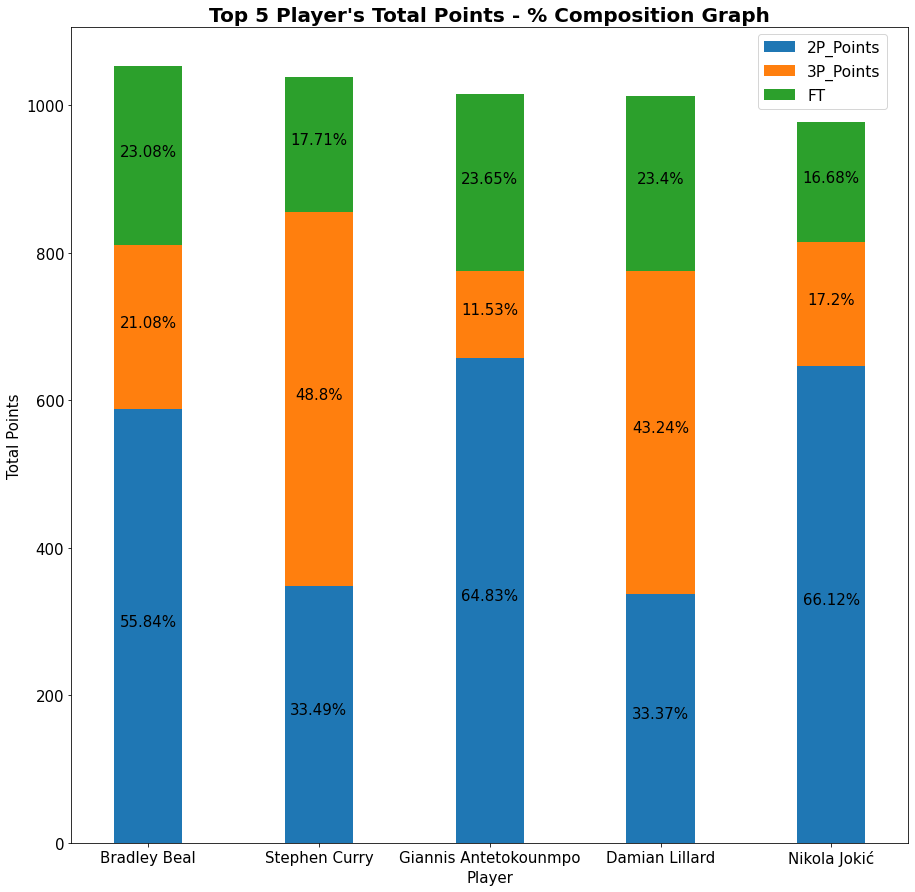

In [39]:
# Percentage Composition Barplot creation
top5_players['2P_Points'] = top5_players['2P'] * 2
top5_players['3P_Points'] = top5_players['3P'] * 3
barplot = top5_players[['Player','2P_Points','3P_Points','FT']].plot(kind='bar',x='Player',figsize=(15,15),fontsize=15,stacked=True,width=0.4)
plt.xticks(rotation=0)
plt.xlabel('Player',fontsize=15)
plt.legend(fontsize=15.5,loc=(0.82,0.9))
plt.title("Top 5 Player's Total Points - % Composition Graph",fontsize= 20,fontweight='bold')
plt.ylabel('Total Points',fontsize=15)

# Getting the rectangular bars (There will be 15 bars)
bars = barplot.patches

j = 0

# Loop to insert the percentages to the bars
for i in range(len(bars)):
    if (i)%5 == 0:
        j=0
    if i+1 in range(6):
        barplot.text(bars[i].get_x() + bars[i].get_width() / 2, bars[i].get_height()/2, 
        f"{round(list(top5_players['2P_Points'])[j]/list(top5_players['PTS'])[j]*100,2)}%",ha='center',fontsize=15)
        j+=1
    elif i+1 in range(6,11):
        barplot.text(bars[i].get_x() + bars[i].get_width() / 2, bars[i-5].get_height() + bars[i].get_height()/2, 
        f"{round(list(top5_players['3P_Points'])[j]/list(top5_players['PTS'])[j]*100,2)}%",ha='center',fontsize=15)
        j+=1
    elif i+1 in range(11,16):
        barplot.text(bars[i].get_x() + bars[i].get_width() / 2, bars[i-10].get_height()+ bars[i-5].get_height() + bars[i].get_height()/2, 
        f"{round(list(top5_players['FT'])[j]/list(top5_players['PTS'])[j]*100,2)}%",ha='center',fontsize=15)
        j+=1

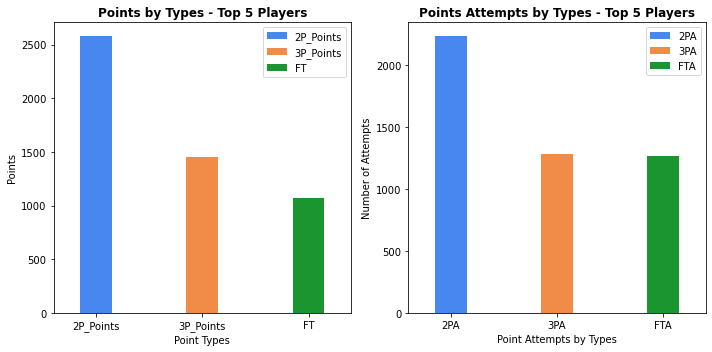

In [40]:
# Barplots for Different point types and point attempts
fig, axes = plt.subplots(1,2,figsize=(10,5))
plt.xticks(rotation=0)
barplot = top5_players[['2P_Points','3P_Points','FT']].sum().plot(ax = axes[0],kind='bar',color = ['#4886F0','#F08B48','#1B952F'],width=0.3)
axes[0].set_xticklabels(rotation=0,labels = ['2P_Points','3P_Points','FT'])
axes[0].set_ylabel('Points')
axes[0].set_xlabel('Point Types')
axes[0].legend(handles = barplot.patches, labels=['2P_Points','3P_Points','FT'])
axes[0].set_title('Points by Types - Top 5 Players',fontweight='bold')
barplot1 = top5_players[['2PA','3PA','FTA']].sum().plot(ax = axes[1],kind='bar',color = ['#4886F0','#F08B48','#1B952F'],width=0.3)
axes[1].set_xticklabels(rotation=0,labels = ['2PA','3PA','FTA'])
axes[1].set_ylabel('Number of Attempts')
axes[1].set_xlabel('Point Attempts by Types')
axes[1].legend(handles = barplot1.patches, labels=['2PA','3PA','FTA'])
axes[1].set_title('Points Attempts by Types - Top 5 Players',fontweight='bold')
plt.tight_layout()

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.

In [41]:
# Testing whether the number of 3P attempts is greater than the number of 3P points scored
len(nba_players.loc[nba_players['3P'] > nba_players['3PA']]) == 0

True

Text(0, 0.5, '3P% - Calculated 3P%')

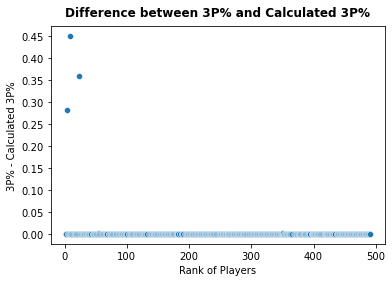

In [42]:
# Scatter plot to find the errors with 3P% values calculations
nba_players['3P%_Calc'] = round(nba_players['3P'] / nba_players['3PA'],3)
nba_players['3P%_diff'] = abs(nba_players['3P%_Calc'] - round(nba_players['3P%'],3))
sns.scatterplot(y='3P%_diff',x='Rk',data=nba_players)
plt.yticks(np.arange(0,0.5,0.05));
plt.title('Difference between 3P% and Calculated 3P%',pad=10,fontweight='bold')
plt.xlabel('Rank of Players')
plt.ylabel('3P% - Calculated 3P%')

In [43]:
# From the visualisation its clear there are 3 wrong values. Figuring out the observations below.
nba_players.loc[nba_players['3P%_diff']>0,['Rk','Player','3P%','3P%_Calc','3P%_diff']]

,Rk,Player,3P%,3P%_Calc,3P%_diff
3,4,Bam Adebayo,0.050,0.333,0.283
8,9,Jarrett Allen,0.050,0.500,0.450
25,24,Marvin Bagley III,0.730,0.370,0.360
56,55,Jordan Bone,0.313,0.312,0.001
362,351,Victor Oladipo,0.313,0.312,0.001


In [44]:
# fixing the errors with 3P% values
nba_players.loc[nba_players['3P%_diff']>0,'3P%'] = nba_players.loc[nba_players['3P%_diff']>0,'3P%_Calc']

In [45]:
# Writing the file after fixing the errors with 3P, 3PA and 3P% values.
del [nba_players['3P%_diff'], nba_players['3P%_Calc']]
nba_players.to_csv('cleaned_NBA_players_stats.csv',index=False)

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


Text(0, 0.5, 'Total Points')

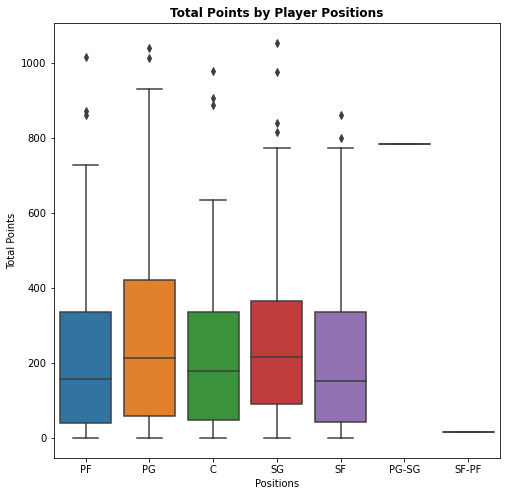

In [46]:
# Boxplot to find the relationship betweeen Positions and Total Points
fig = plt.figure(figsize=(8,8))
sns.boxplot(x = 'Pos',y='PTS',data=nba_players)
plt.title('Total Points by Player Positions',fontweight='bold');
plt.xlabel('Positions')
plt.ylabel('Total Points')

In [47]:
# statistics of players points by position
nba_players.groupby('Pos')['PTS'].describe().dropna()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,98.0,217.244898,202.765929,0.0,47.75,179.5,337.00,977.0
PF,102.0,218.539216,217.233673,0.0,40.50,157.5,334.50,1015.0
PG,96.0,276.375000,257.459092,0.0,59.00,214.0,420.00,1039.0
SF,86.0,225.686047,220.503022,0.0,42.25,151.5,335.75,861.0
SG,119.0,263.932773,228.163327,0.0,90.00,216.0,366.00,1053.0


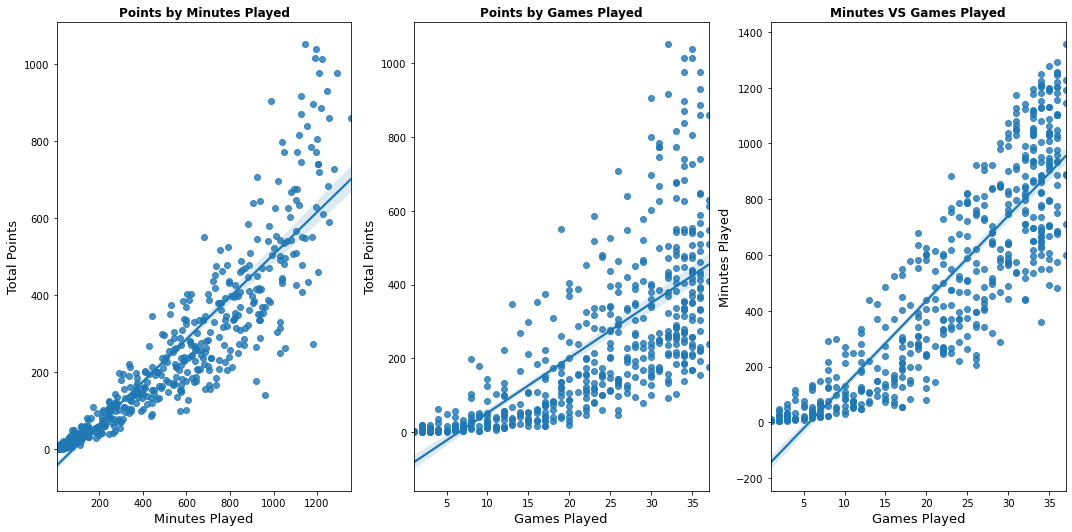

In [48]:
# Regression plots for finding relationship between Games, Minutes Played with Total Points
fig, axes = plt.subplots(1,3,figsize=(15,7.5))
sns.regplot(x ='MP',y ='PTS', data=nba_players,ax = axes[0])
sns.regplot(x ='G',y ='PTS', data=nba_players,ax = axes[1])
sns.regplot(x ='G',y ='MP', data=nba_players,ax = axes[2])
axes[0].set_title('Points by Minutes Played', fontweight='bold')
axes[0].set_xlabel('Minutes Played',fontsize=13)
axes[0].set_ylabel('Total Points',fontsize=13)
axes[1].set_title('Points by Games Played', fontweight='bold')
axes[1].set_xlabel('Games Played',fontsize=13)
axes[1].set_ylabel('Total Points',fontsize=13)
axes[2].set_title('Minutes VS Games Played', fontweight='bold')
axes[2].set_xlabel('Games Played',fontsize=13)
axes[2].set_ylabel('Minutes Played',fontsize=13)
fig.tight_layout()

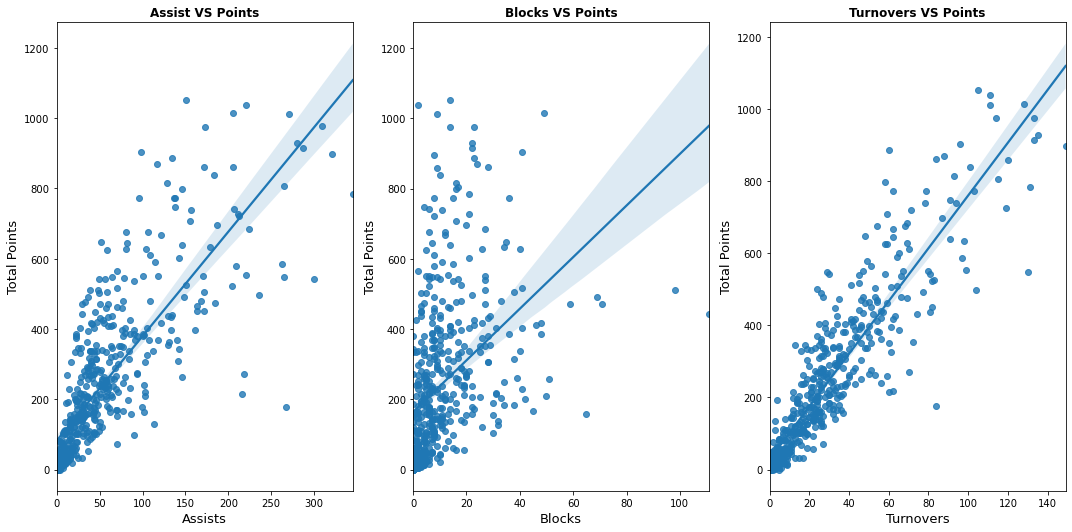

In [49]:
# Regression plots for finding relationship between Assists, Blocks, Turnovers with Total Points
fig, axes = plt.subplots(1,3,figsize=(15,7.5))
sns.regplot(x ='AST',y ='PTS', data=nba_players,ax = axes[0])
sns.regplot(x ='BLK',y ='PTS', data=nba_players,ax = axes[1])
sns.regplot(x ='TOV',y ='PTS', data=nba_players,ax = axes[2])
axes[0].set_title('Assist VS Points', fontweight='bold')
axes[0].set_xlabel('Assists',fontsize=13)
axes[0].set_ylabel('Total Points',fontsize=13)
axes[1].set_title('Blocks VS Points',fontweight='bold')
axes[1].set_xlabel('Blocks',fontsize=13)
axes[1].set_ylabel('Total Points',fontsize=13)
axes[2].set_title('Turnovers VS Points',fontweight='bold')
axes[2].set_xlabel('Turnovers',fontsize=13)
axes[2].set_ylabel('Total Points',fontsize=13)
fig.tight_layout()

In [51]:
# Getting the correlations between different columns
nba_players[['G','MP','AST','BLK','TOV','PTS']].corr()

,G,MP,AST,BLK,TOV,PTS
G,1.000000,0.869729,0.549302,0.475057,0.644918,0.694438
MP,0.869729,1.000000,0.749985,0.506384,0.838068,0.899814
AST,0.549302,0.749985,1.000000,0.210983,0.890698,0.799923
BLK,0.475057,0.506384,0.210983,1.000000,0.408831,0.422836
TOV,0.644918,0.838068,0.890698,0.408831,1.000000,0.906214
PTS,0.694438,0.899814,0.799923,0.422836,0.906214,1.000000
